In [3]:
import sys 
sys.path.append(r'..')

from estim8.models import FmuModel
from estim8.error_models import BaseErrorModel, LinearErrorModel
from estim8 import visualization, datatypes, Estimator, utils, datatypes
import pandas as pd
import matplotlib.pyplot as plt

# load and init model
SimpleBatchModel = FmuModel(path=r'SimpleBatch.fmu')
# import datasheet
data = pd.read_excel(r'SimpleBatch_Data.xlsx', index_col=0)

In [4]:
sim1 = SimpleBatchModel.simulate(0, 10, 0.1)
sim2 = SimpleBatchModel.simulate(0, 10, 0.1, parameters={'X0': 0.4})

In [31]:
from estim8.visualization import plot_model_prediction, plot_measurement
import seaborn as sns
from itertools import cycle
from matplotlib import lines

rel_figure_width = 6
rel_fig_height = 4


linestyles = lines.lineStyles.copy()
linestyles.pop('None')


def plot_simulations(sims: list[datatypes.Simulation], observe: list[str]=None, data: datatypes.Experiment=None, labels: list[str]=None):
    """Plots multiple simulations in one figure

    Parameters
    ----------
    sims : list[datatypes.Simulation]
        List of simulations to plot
    observe : list[str], optional
        List of model observables to plot, by default None which means all names observables from the first object if sims will be used
    data : datatypes.Experiment, optional
        Experimental data to plot along_, by default None
    labels : list[str], optional
        Labels to map to the simulations, by default None in which case a the index+1 of a simulation in sims will be used.

    Returns
    -------
    matplotlib.figure.Figure
        A figure with the plotted simulations.
    """

    # create a list of observables if not defined
    if observe is None:
        _observe = [m_pred.name for m_pred in sims[0].model_predictions]
    else:
        _observe = observe
    
    # create labels of simulation
    if labels is None:
        _labels = list(map(str, range(len(sims))))
    else:
        _labels = labels

    # Define subplot grid:
    ncols = min(3, len(_observe))
    nrows = int(len(_observe) / ncols) + bool(len(_observe) % ncols)

    fig, axes = plt.subplots(
        ncols=ncols,
        nrows=nrows,
        figsize=(rel_figure_width * ncols, rel_fig_height * nrows),
    )
    if len(axes)==1:
        axes=[axes]

    # set axis of by default
    for ax in axes.flat:
        ax.set_axis_off()

    for ax, obs, color in zip(axes.flat, _observe, cycle(sns.color_palette("colorblind", len(_observe)))):
        # and tun on used axis
        ax.set_axis_on()
        for sim, label, linestyle in zip(sims, _labels, linestyles):
            # NOTE: only supports 7 linestyles to destinguish between simulations 
            plot_model_prediction(
                ax=ax,
                model_prediction=sim[obs],
                linestyle=linestyle,
                color=color,
                label= f"{sim[obs]} {label}"
            )

        if data is not None:
            if obs in data.observation_mapping.values():
                plot_measurement(
                    ax=ax,
                    measurement=data.getbysimkey(obs),
                    color=color, 
                    ecolor=color
                )
        ax.legend()
        ax.set_title(obs)
        ax.set_xlabel('time [h]')
    
    
    fig.tight_layout()
    return fig   




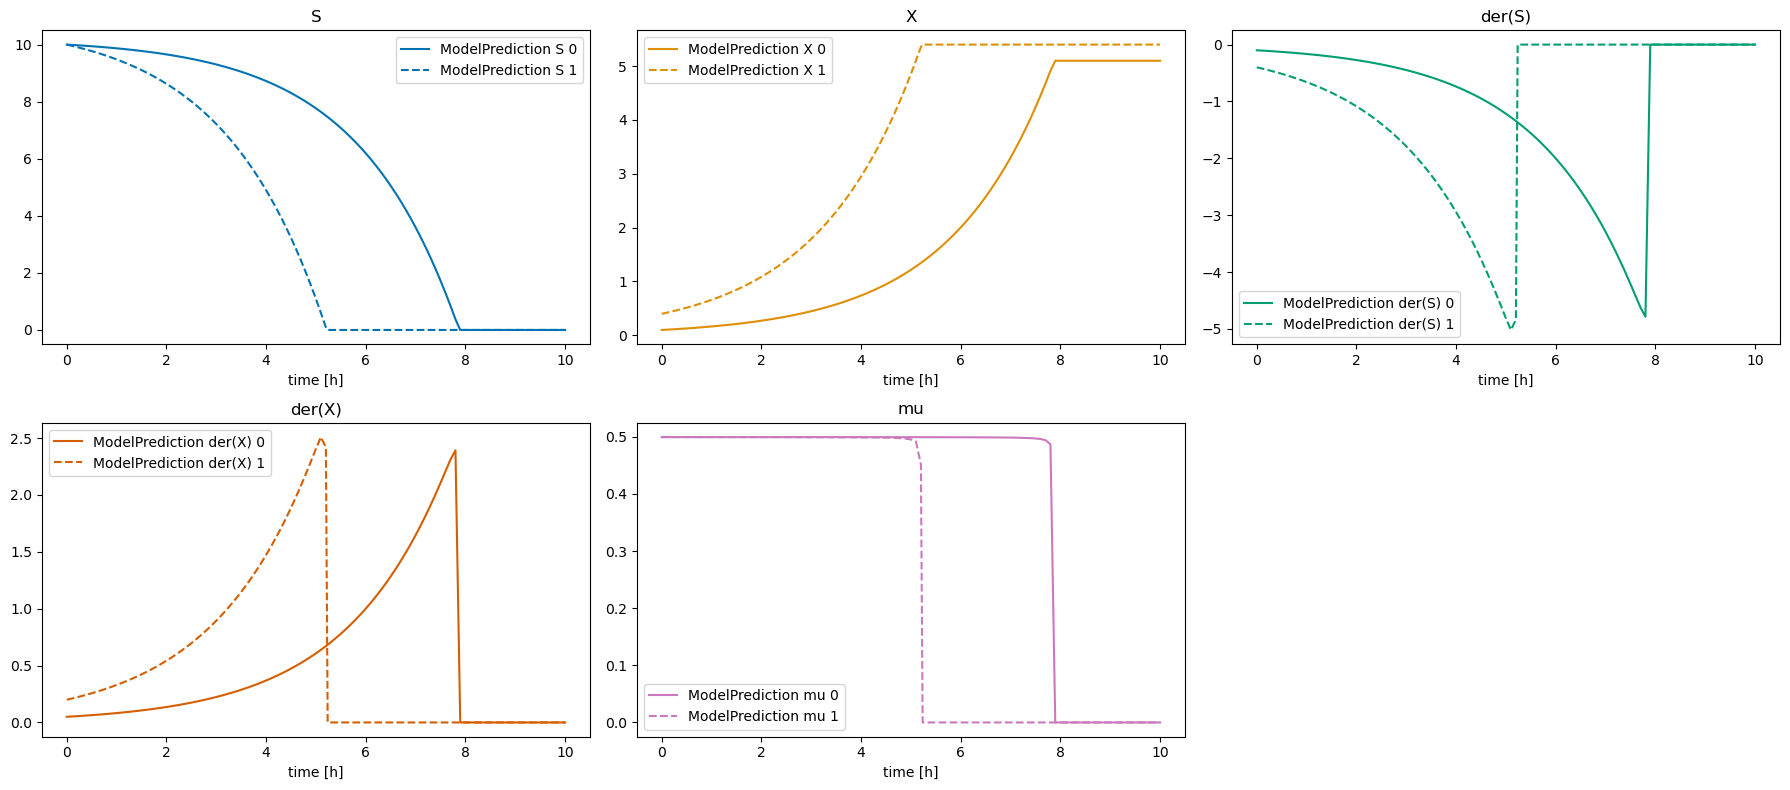

In [32]:
fig = plot_simulations([sim1, sim2])